In [19]:
import pandas as pd
import numpy as  np
import random

In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d sid321axn/malicious-urls-dataset

Dataset URL: https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset
License(s): CC0-1.0
 30% 5.00M/16.9M [00:00<00:00, 50.5MB/s]
100% 16.9M/16.9M [00:00<00:00, 97.9MB/s]


In [4]:
!unzip /content/malicious-urls-dataset.zip

Archive:  /content/malicious-urls-dataset.zip
  inflating: malicious_phish.csv     


In [20]:
data=pd.read_csv('/content/malicious_phish.csv')

In [65]:
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [21]:
data['type'].value_counts()

,count
type,
benign,428103
defacement,96457
phishing,94111
malware,32520


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [22]:
type_mapping={
    'benign':0,
    'defacement':1,
    'phishing':2,
    'malware':3
}


In [23]:
data['type']=data['type'].map(type_mapping)

In [11]:
data

,url,type
0,br-icloud.com.br,2
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,2
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,2
651188,www.gamespot.com/xbox360/action/deadspace/,2
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),2


In [24]:
def get_url_len(url):
  return len(url)

get_url_len('mp3raid.com/music/krizz_kaliko.html')

35

In [25]:
data['url_len']=data['url'].str.len()

In [14]:
data

,url,type,url_len
0,br-icloud.com.br,2,16
1,mp3raid.com/music/krizz_kaliko.html,0,35
2,bopsecrets.org/rexroth/cr/1.htm,0,31
3,http://www.garage-pirenne.be/index.php?option=...,1,88
4,http://adventure-nicaragua.net/index.php?optio...,1,235
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,2,39
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,2,44
651188,www.gamespot.com/xbox360/action/deadspace/,2,42
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),2,45


In [15]:
# Check for missing values
data.isnull().sum()


,0
url,0
type,0
url_len,0


In [26]:
# Extract domain length
def get_domain_len(url):
    try:
        return len(url.split('/')[2])
    except:
        return 0

# Check if URL contains special characters
def has_special_chars(url):
    special_chars = ['?', '@', '&', '=', '%', '.', '-', '_', '/']
    return sum([1 for char in special_chars if char in url])

# Count digits in URL
def count_digits(url):
    return sum(c.isdigit() for c in url)

# Apply the functions to the dataset
data['domain_len'] = data['url'].apply(get_domain_len)
data['special_char_count'] = data['url'].apply(has_special_chars)
data['digit_count'] = data['url'].apply(count_digits)

# Check the updated dataset
data.head()


,url,type,url_len,domain_len,special_char_count,digit_count
0,br-icloud.com.br,2,16,0,2,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,17,3,1
2,bopsecrets.org/rexroth/cr/1.htm,0,31,2,2,1
3,http://www.garage-pirenne.be/index.php?option=...,1,88,21,7,7
4,http://adventure-nicaragua.net/index.php?optio...,1,235,23,7,22


In [17]:
data

,url,type,url_len,domain_len,special_char_count,digit_count
0,br-icloud.com.br,2,16,0,2,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,17,3,1
2,bopsecrets.org/rexroth/cr/1.htm,0,31,2,2,1
3,http://www.garage-pirenne.be/index.php?option=...,1,88,21,7,7
4,http://adventure-nicaragua.net/index.php?optio...,1,235,23,7,22
...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,2,39,3,2,12
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,2,44,4,3,7
651188,www.gamespot.com/xbox360/action/deadspace/,2,42,6,2,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),2,45,23,3,0


In [27]:
# Function to check if URL uses HTTP or HTTPS
def check_protocol(url):
    if url.startswith('https://'):
        return 1  # HTTPS
    elif url.startswith('http://'):
        return 0  # HTTP
    return -1  # No protocol (or non-standard)

# Function to count occurrences of a specific character
def count_character(url, char):
    return url.count(char)

# Function to extract subdomain count (count of dots before the domain name)
def count_subdomains(url):
    try:
        domain = url.split('/')[2]
        return domain.count('.')  # Count of dots in the domain name
    except:
        return 0

# Apply the functions to the dataset
data['protocol'] = data['url'].apply(check_protocol)  # 1 for HTTPS, 0 for HTTP
data['underscore_count'] = data['url'].apply(lambda x: count_character(x, '_'))  # Count underscores
data['dot_count'] = data['url'].apply(lambda x: count_character(x, '.'))  # Count dots
data['slash_count'] = data['url'].apply(lambda x: count_character(x, '/'))  # Count slashes


# Check the updated dataset
data.head()


,url,type,url_len,domain_len,special_char_count,digit_count,protocol,underscore_count,dot_count,slash_count
0,br-icloud.com.br,2,16,0,2,0,-1,0,2,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,17,3,1,-1,1,2,2
2,bopsecrets.org/rexroth/cr/1.htm,0,31,2,2,1,-1,0,2,3
3,http://www.garage-pirenne.be/index.php?option=...,1,88,21,7,7,0,2,3,3
4,http://adventure-nicaragua.net/index.php?optio...,1,235,23,7,22,0,1,2,3


In [28]:
# Function to count parameters in the URL (indicated by '?' and '&')
def count_params(url):
    try:
        return url.split('?')[1].count('&') + 1  # Count parameters separated by '&'
    except:
        return 0  # No parameters

# Function to count the number of letters (alphabets) in the URL
def letter_count(url):
    return sum(c.isalpha() for c in url)

# Function to count uppercase letters in the URL
def uppercase_count(url):
    return sum(c.isupper() for c in url)

# Function to count lowercase letters in the URL
def lowercase_count(url):
    return sum(c.islower() for c in url)

# Apply these functions to the dataset
data['param_count'] = data['url'].apply(count_params)  # Count URL parameters
data['letter_count'] = data['url'].apply(letter_count)  # Count alphabetic characters


# Check the updated dataset with new features
data.head()


,url,type,url_len,domain_len,special_char_count,digit_count,protocol,underscore_count,dot_count,slash_count,param_count,letter_count
0,br-icloud.com.br,2,16,0,2,0,-1,0,2,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,0,35,17,3,1,-1,1,2,2,0,29
2,bopsecrets.org/rexroth/cr/1.htm,0,31,2,2,1,-1,0,2,3,0,25
3,http://www.garage-pirenne.be/index.php?option=...,1,88,21,7,7,0,2,3,3,4,63
4,http://adventure-nicaragua.net/index.php?optio...,1,235,23,7,22,0,1,2,3,3,199


In [29]:
import re

# Check if the URL contains '.php'
def has_php(url):
    return 1 if '.php' in url else 0

# Check if the URL contains '.html'
def has_html(url):
    return 1 if '.html' in url else 0

# Check if the URL contains an IP address (using regex to match patterns)
def has_ip(url):
    ip_pattern = r'(?:\d{1,3}\.){3}\d{1,3}'  # Pattern to match IP addresses
    return 1 if re.search(ip_pattern, url) else 0

# List of potentially malicious top-level domains (TLDs)
malicious_tlds = ['.ru', '.cn', '.tk', '.br', '.biz', '.info', '.xyz']

# Check if the URL has a potentially malicious top-level domain
def mal_tld(url):
    return 1 if any(url.endswith(tld) for tld in malicious_tlds) else 0

# Apply these functions to the dataset
data['has_php'] = data['url'].apply(has_php)  # Check if URL has '.php'
data['has_html'] = data['url'].apply(has_html)  # Check if URL has '.html'
data['has_ip'] = data['url'].apply(has_ip)  # Check if URL contains an IP address
data['mal_tld'] = data['url'].apply(mal_tld)  # Check for potentially malicious TLDs

# Check the updated dataset with new features
data.head()


,url,type,url_len,domain_len,special_char_count,digit_count,protocol,underscore_count,dot_count,slash_count,param_count,letter_count,has_php,has_html,has_ip,mal_tld
0,br-icloud.com.br,2,16,0,2,0,-1,0,2,0,0,13,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,0,35,17,3,1,-1,1,2,2,0,29,0,1,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,2,2,1,-1,0,2,3,0,25,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,88,21,7,7,0,2,3,3,4,63,1,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,1,235,23,7,22,0,1,2,3,3,199,1,0,0,0


In [30]:
# List of common URL shortening services (expanded)
shorteners = [
    'bit.ly', 'goo.gl', 'tinyurl.com', 'ow.ly', 't.co', 'is.gd', 'buff.ly',
    'adf.ly', 'shorte.st', 'clck.ru', 'u.to', 'x.co', 'tr.im', 'tiny.cc',
    'lnkd.in', 'fb.me', 'po.st', 'mcaf.ee', 'ift.tt', 'v.gd'
]

# Function to check if URL is shortened (return 1 for shortened, 0 otherwise)
def is_shortened(url):
    return 1 if any(shortener in url for shortener in shorteners) else 0

# Apply the function to the dataset
data['shortened'] = data['url'].apply(is_shortened)


data.head()


,url,type,url_len,domain_len,special_char_count,digit_count,protocol,underscore_count,dot_count,slash_count,param_count,letter_count,has_php,has_html,has_ip,mal_tld,shortened
0,br-icloud.com.br,2,16,0,2,0,-1,0,2,0,0,13,0,0,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,17,3,1,-1,1,2,2,0,29,0,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,2,2,1,-1,0,2,3,0,25,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,88,21,7,7,0,2,3,3,4,63,1,0,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,1,235,23,7,22,0,1,2,3,3,199,1,0,0,0,0


In [24]:
data

,url,type,url_len,domain_len,special_char_count,digit_count,protocol,underscore_count,dot_count,slash_count,subdomain_count,param_count,letter_count,uppercase_count,lowercase_count,has_php,has_html,has_ip,mal_tld,shortened
0,br-icloud.com.br,2,16,0,2,0,-1,0,2,0,0,0,13,0,13,0,0,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,17,3,1,-1,1,2,2,1,0,29,0,29,0,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,2,2,1,-1,0,2,3,0,0,25,0,25,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,88,21,7,7,0,2,3,3,2,4,63,0,63,1,0,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,1,235,23,7,22,0,1,2,3,1,3,199,63,136,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,2,39,3,2,12,-1,0,3,3,0,0,21,0,21,0,1,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,2,44,4,3,7,-1,0,2,4,0,0,29,2,27,0,0,0,0,1
651188,www.gamespot.com/xbox360/action/deadspace/,2,42,6,2,3,-1,0,2,4,0,0,33,0,33,0,0,0,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),2,45,23,3,0,-1,3,2,2,0,0,36,2,34,0,0,0,0,0


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize the scaler
scaler = StandardScaler()

# Separate features and target variable
X = data.drop(['url', 'type'], axis=1)  # Features
y = data['type']  # Target variable

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(13, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(4, activation='softmax'))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs = 7, validation_split = 0.2)

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


11396/11396 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.8231 - loss: 0.4771 - val_accuracy: 0.8669 - val_loss: 0.3364
Epoch 2/7
11396/11396 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8748 - loss: 0.3248 - val_accuracy: 0.8803 - val_loss: 0.3114
Epoch 3/7
11396/11396 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8824 - loss: 0.3038 - val_accuracy: 0.8825 - val_loss: 0.2979
Epoch 4/7
11396/11396 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8868 - loss: 0.2895 - val_accuracy: 0.8873 - val_loss: 0.2886
Epoch 5/7
11396/11396 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8907 - loss: 0.2818 - val_accuracy: 0.8929 - val_loss: 0.2823
Epoch 6/7
11396/11396 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8936 - loss: 0.2767 - val_accuracy: 0.8989 - val_loss: 0.2775
Epoch 7/7
11396/11396 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8948 - loss: 0.2742 - val_accuracy: 0.8946 - val_loss: 0.2751


In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 13)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 794 (3.11 KB)

 Trainable params: 264 (1.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 530 (2.07 KB)

In [36]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict the labels for the test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Get the class with the highest probability

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))


6105/6105 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8939 - loss: 0.2750
Test Accuracy: 89.41%
6105/6105 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.97      0.94    128733
           1       0.88      0.95      0.91     28692
           2       0.77      0.54      0.64     28234
           3       0.85      0.76      0.80      9699

    accuracy                           0.89    195358
   macro avg       0.85      0.81      0.82    195358
weighted avg       0.89      0.89      0.89    195358



In [38]:
import matplotlib.pyplot as plt

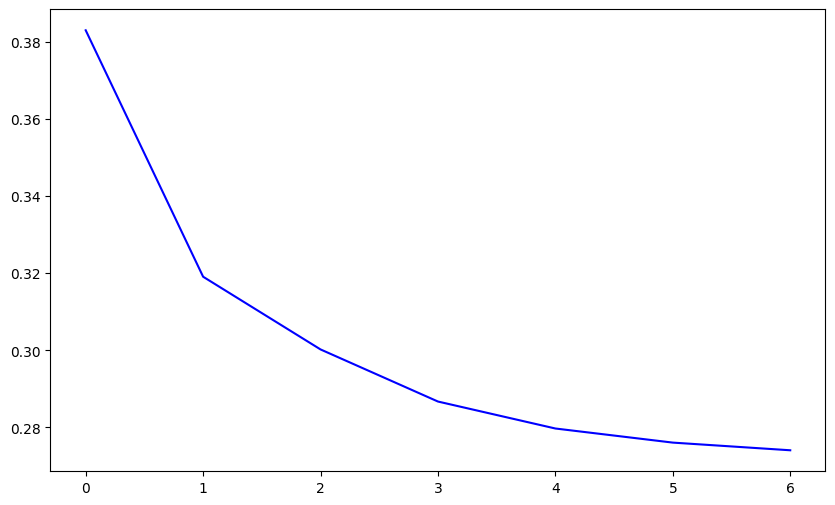

In [39]:
train_loss = history.history['loss']

epoch = np.arange(len(train_loss))

plt.figure(figsize=(10, 6))
plt.plot(epoch, train_loss, label='Training Loss', color='blue')

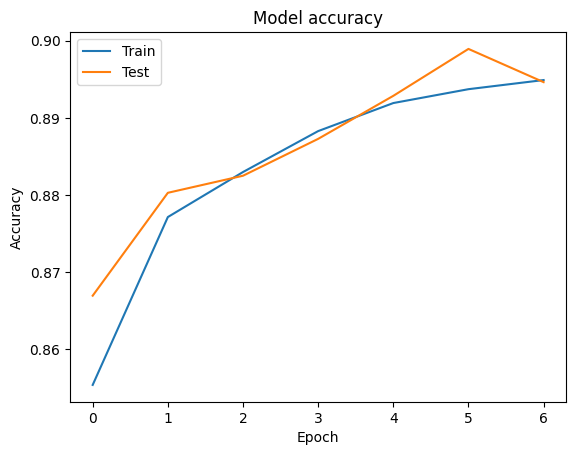

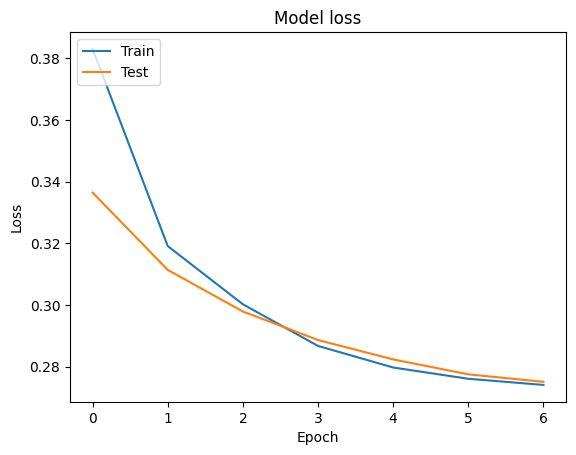

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [41]:
model.save('malicious_url_classifier.h5')

In [95]:
data

,url,type,url_len,domain_len,special_char_count,digit_count,protocol,underscore_count,dot_count,slash_count,param_count,letter_count,has_php,has_html,has_ip,mal_tld,shortened
0,br-icloud.com.br,2,16,0,2,0,-1,0,2,0,0,13,0,0,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,17,3,1,-1,1,2,2,0,29,0,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,2,2,1,-1,0,2,3,0,25,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,88,21,7,7,0,2,3,3,4,63,1,0,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,1,235,23,7,22,0,1,2,3,3,199,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,2,39,3,2,12,-1,0,3,3,0,21,0,1,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,2,44,4,3,7,-1,0,2,4,0,29,0,0,0,0,1
651188,www.gamespot.com/xbox360/action/deadspace/,2,42,6,2,3,-1,0,2,4,0,33,0,0,0,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),2,45,23,3,0,-1,3,2,2,0,36,0,0,0,0,0


In [43]:
X_train[0]

array([ 5.89542724,  1.07130624,  2.59144193,  3.54447457,  3.28933456,
        2.19575826,  0.53969983,  2.12675439,  1.62319988,  6.41126455,
       -0.39343428, -0.45201918, -0.13989168, -0.06115074,  3.92621961])